#Assignment 2 - introduction to Machine learning (10%, due 12 March 11:59 p.m.)
Train, test, and evaluate multiple machine learning models and techniques to solve each specific problem.

1. [3%] Task 1 - Regression
2. [3%] Task 2 - Classification
3. [4%] Task 3 - Text Classification
---


Please submit your colab worksheet to google classroom by 12 March  11:59 p.m. Late submission will deduct 1% per day.

***Pycaret is not allowed***

## Task 1: Regression

Train a regression model to predict the burnt calories based on the Calories-Exercise dataset. Use all necessary techniques to train a regression model that performs with a mean absolute error equal to or lesser than 9 calories. You are free to choose how to preprocess data, transform columns, and split datasets.


- Q1: What features do you use to achieve this goal? How do you process it?
- Q2: Plot the graph to show the important feature based on the coefficients(weights) of a trained linear regression model.
- Q3: How do you explain the relationship between features and target variables(Calories) based on coefficient?

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from pythainlp.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import os

os.chdir('/Users/fulinq/Documents/KMITL/FinancialEngineering/Y2/T2/FE_IntroToDataScience/asg2')
pd.set_option('display.max_columns', 74)
pd.set_option('display.width', 500)


# !gdown 1kyS5sVY4_UEP55Me349GT43S7hA5fDOU
# !gdown 150C3IHQ7aBceATpKLasrSlFrsjZWucTi

# df_exercise = pd.read_csv('/content/exercise.csv')
# df_calories = pd.read_csv('/content/calories.csv')

df_exercise = pd.read_csv('exercise.csv')
df_calories = pd.read_csv('calories.csv')

print(df_exercise)
print(df_calories)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]
        User_ID  Calories
0      14733

In [27]:
df_1 = pd.merge(df_exercise, df_calories, on='User_ID')

X = df_1.drop(['User_ID', 'Calories'], axis=1)
y = df_1['Calories']


numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
categorical_features = ['Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)


model_pipeline.fit(X_train, y_train)


y_pred = model_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(mae)

8.371534503602621


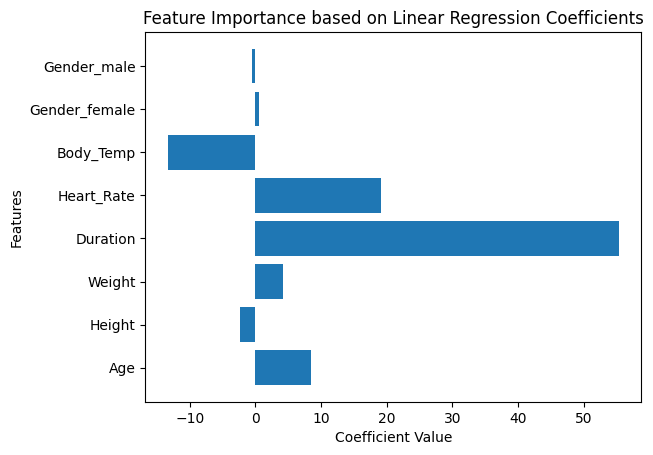

In [28]:
feature_names = numerical_features + \
                list(model_pipeline.named_steps['preprocessor']\
                     .named_transformers_['cat']\
                     .get_feature_names_out(categorical_features))
coefficients = model_pipeline.named_steps['regressor'].coef_

#plot with correct name
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance based on Linear Regression Coefficients')
plt.show()

## Task 2: Classification
Train a machine learning model to help us predict the sex (Male, Female, and Infant) of an abalone. Here is the [detail](https://archive.ics.uci.edu/dataset/1/abalone) to the dataset. Use all necessary techniques to train classification models in sklearn. You are free to choose how to preprocess data, transform columns, and split datasets.

Q4: create a pair-plot from Seaborn to help us understand the relationship between features and labels on this dataset where hue is "Type."

Q5:  choose at least 3 Multiclass classification algorithms from [this](https://scikit-learn.org/stable/modules/multiclass.html). Compare the F1-score performance on each algorithm.

Q6: Perform a Top K feature selection with [Chi-Sqaure score](https://saturncloud.io/blog/sklearn-chi2-for-feature-selection-a-comprehensive-guide-for-data-scientists/) where we only select the top 3 features from the Chi-Sqaure score to train the model.

Q6.1: What are the top 3 features based on the Chi-Sqaure score?

Q6.2: Do you observe any difference between a model trained with all features and a model trained?

Q6.3: what can we infer about the power of predictability of the top 3 features on this dataset?

In [29]:
# !gdown 1RysTtIgmqZdMh2ioutL9b46NqZVjw06N

# df_abalone = pd.read_csv('/content/abalone.csv')

df_abalone = pd.read_csv('abalone.csv')

print(df_abalone)
print(df_abalone.info())

     Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  ShellWeight  Rings
0       M         0.455     0.365   0.095       0.5140         0.2245         0.1010       0.1500     15
1       M         0.350     0.265   0.090       0.2255         0.0995         0.0485       0.0700      7
2       F         0.530     0.420   0.135       0.6770         0.2565         0.1415       0.2100      9
3       M         0.440     0.365   0.125       0.5160         0.2155         0.1140       0.1550     10
4       I         0.330     0.255   0.080       0.2050         0.0895         0.0395       0.0550      7
...   ...           ...       ...     ...          ...            ...            ...          ...    ...
4172    F         0.565     0.450   0.165       0.8870         0.3700         0.2390       0.2490     11
4173    M         0.590     0.440   0.135       0.9660         0.4390         0.2145       0.2605     10
4174    M         0.600     0.475   0.205       1.1760 

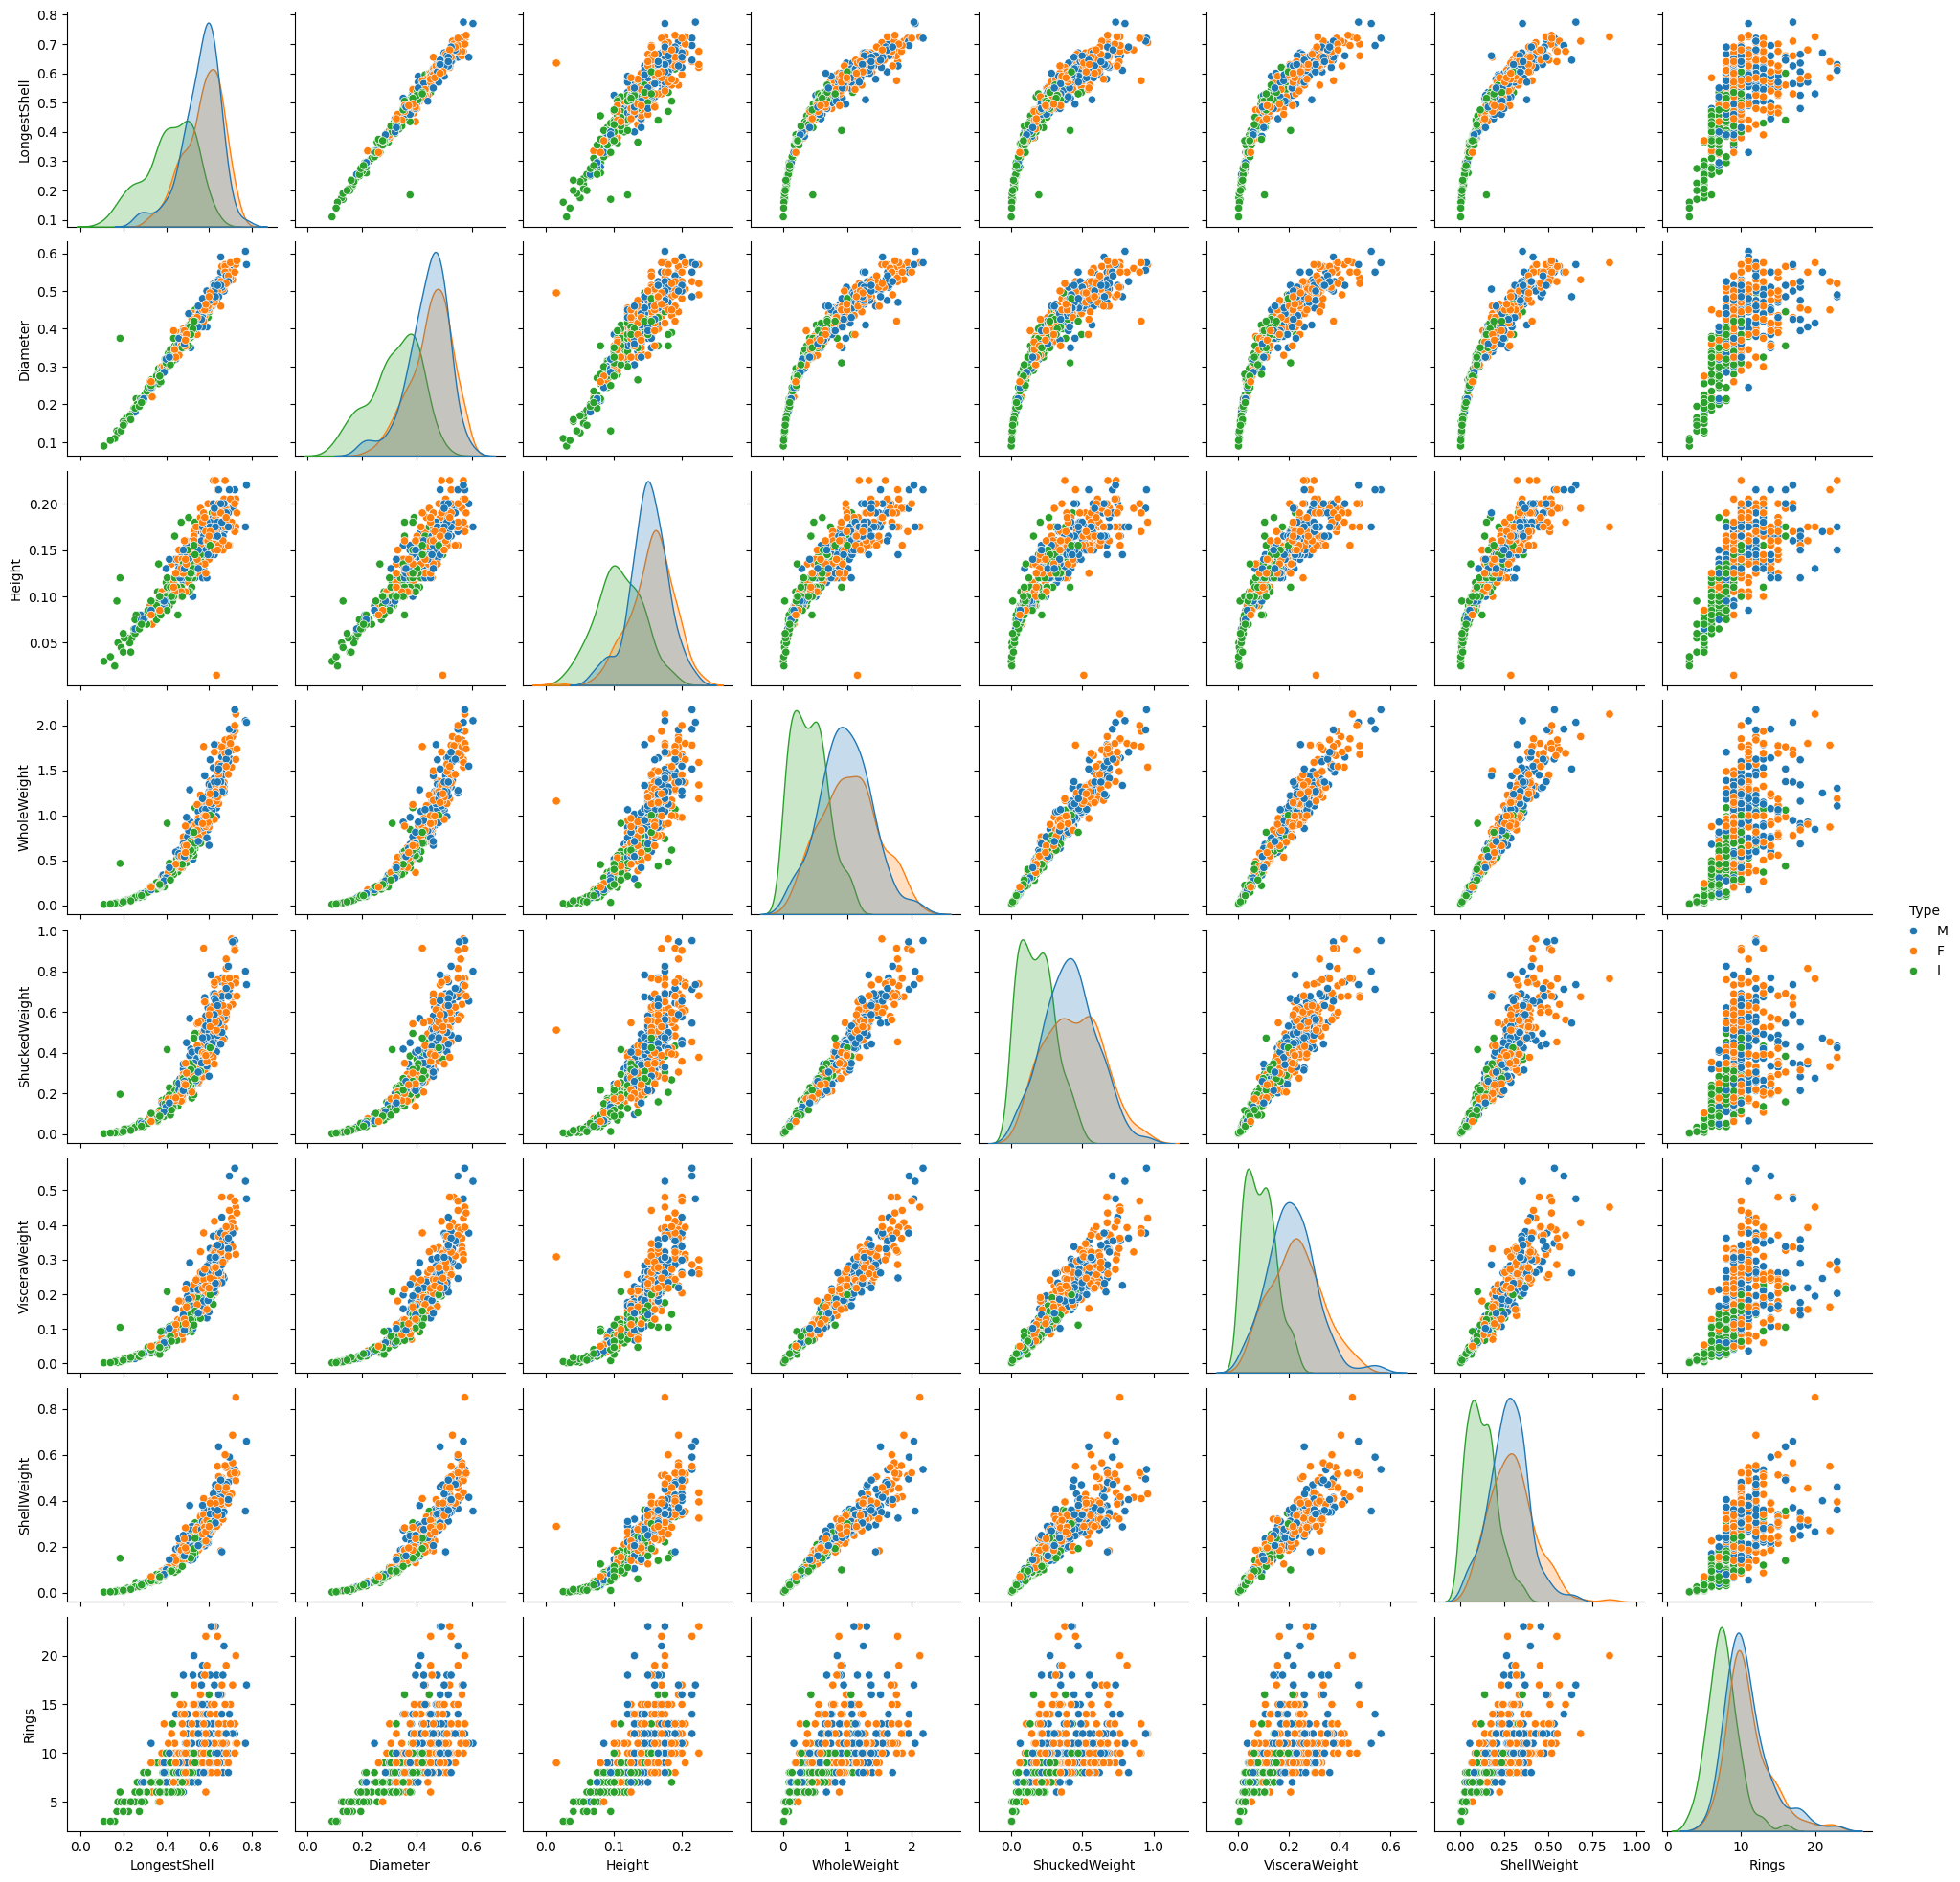

In [30]:
df_abalone_sampled = df_abalone.sample(n=500, random_state=42)

sns.pairplot(df_abalone_sampled, hue="Type")
plt.show()

In [31]:
label_encoder = LabelEncoder()
df_abalone['Sex_encoded'] = label_encoder.fit_transform(df_abalone['Type'])


X = df_abalone.drop(['Type', 'Sex_encoded'], axis=1)
y = df_abalone['Sex_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}


f1_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')

print(f1_scores)

{'Random Forest': 0.5658204666427944, 'SVC': 0.43970487370890116, 'Logistic Regression': 0.5312206291691107}


In [32]:
chi_selector = SelectKBest(chi2, k=3)
X_kbest = chi_selector.fit_transform(X, y)

chi_scores = chi_selector.scores_
top_3_features = np.argsort(chi_scores)[-3:]

top_3_feature_names = [X.columns[i] for i in top_3_features]

top_3_feature_names, chi_scores[top_3_features]

(['ShuckedWeight', 'WholeWeight', 'Rings'],
 array([156.24903169, 379.33023161, 843.70620244]))

In [33]:
X_train_top3, X_test_top3, y_train, y_test = train_test_split(X[top_3_feature_names], y, test_size=0.3, random_state=42)

model_top3 = LogisticRegression(max_iter=1000, random_state=42)
model_top3.fit(X_train_top3, y_train)
y_pred_top3 = model_top3.predict(X_test_top3)

f1_score_top3 = f1_score(y_test, y_pred_top3, average='weighted')

f1_score_all_features = f1_scores['Logistic Regression']

print(f'f1_score_top3 : {f1_score_top3}\nf1_score_all_features : {f1_score_all_features}')

f1_score_top3 : 0.5397872381544433
f1_score_all_features : 0.5312206291691107


## Text classification
Train a machine learning model to help us predict the class of sentiment  (Positive, Neutral, and Negative) on Thai wisesight_sentiment [dataset](https://huggingface.co/datasets/wisesight_sentiment).

1. Tokenize and preprocess dataset with PythaiNLP [tokenize function](https://pythainlp.github.io/dev-docs/api/tokenize.html#).
2. Use 2 different document representation techniques 1) bag of words [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and 2) TF-IDF [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to create feature vectors.   
3. Choose one of the models of multiclass classification on sklearn to train 2 text classification models, bag of word model and the TF-IDF model.
4. Report and compare 2 different models with weighted F1-score. Which model does perform better?    

In [34]:
# !pip install pythainlp
# !pip install datasets

In [35]:
from datasets import load_dataset

dataset_name = 'wisesight_sentiment'
dataset = load_dataset(dataset_name)
# print(dataset)

train_dataset = pd.DataFrame(dataset['train'])
test_dataset = pd.DataFrame(dataset['test'])

#exclude category question
train_dataset = train_dataset[train_dataset['category'] != 3]
test_dataset = test_dataset[test_dataset['category'] != 3]

Labels =  { 0:"pos", 1:"neu",2: "neg"}
train_dataset["category"] = train_dataset["category"].apply(lambda x:Labels[x])
test_dataset["category"] = test_dataset["category"].apply(lambda x:Labels[x])
print(train_dataset)
print(test_dataset)

Generating train split:   0%|          | 0/21628 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2404 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2671 [00:00<?, ? examples/s]

                                                   texts category
0      ไปจองมาแล้วนาจา Mitsubishi Attrage ได้หลังสงกร...      neu
1      เปิดศักราชใหม่! นายกฯ แถลงข่าวก่อนการแข่งขันศึ...      neu
2                               บัตรสมาชิกลดได้อีกไหมคับ      neu
3                                    สนใจ new mazda2ครับ      neu
4                                                     😍😍      pos
...                                                  ...      ...
21623                                ไม่ค่อยอยากกินเล๊ย💘      pos
21624                               คิดถึงแม่รุ้งอีกแล้ว      pos
21625  วันนี้อะไปลองมาละบลัช 4u2 สีที่จะเอาหมดอีก โอย...      neg
21626                     ตัวอยู่พฤกษาใจไปแสนสิริ5555555      neu
21627  อย่าช้า มาทดลองขับ Mu-x เอกสิทธิ์พิเศษ รับซัมเ...      neu

[21152 rows x 2 columns]
                                                  texts category
0     ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...      neg
1                                      ครับ #phithan

In [39]:
def tokenize_text(text):
    return ' '.join(word_tokenize(text, engine='newmm'))

train_dataset['texts'] = train_dataset['texts'].apply(tokenize_text)
test_dataset['texts'] = test_dataset['texts'].apply(tokenize_text)

In [42]:
# creating collectiong of word
bow = CountVectorizer()
X_train_bow = bow.fit_transform(train_dataset['texts'])
X_test_bow = bow.transform(test_dataset['texts'])


tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(train_dataset['texts'])
X_test_tfidf = tfidf.transform(test_dataset['texts'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_dataset['category'])
y_test = label_encoder.transform(test_dataset['category'])

model = LogisticRegression(max_iter=1000)

model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)
f1_score_bow = f1_score(y_test, y_pred_bow, average='weighted')

model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
f1_score_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')

print(f'BoW Model F1-Score : {f1_score_bow}')
print(f'TF-IDF Model F1-Score : {f1_score_tfidf}')

BoW Model F1-Score : 0.6728040884159415
TF-IDF Model F1-Score : 0.6774965086896794
